In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import zipfile

In [4]:
import os

# Number of data samples in each class

In [6]:
base_path = r"C:\Users\sayan_dey\Desktop\Sayan Dey\Dataset\MH-SoyaHealthVision An Indian UAV and Leaf Image Dataset for Integrated Crop Health Assessment"


# To store results
counts = {}

# Loop through both main subfolders
for subfolder in ["Soyabean_Leaf_Image_Dataset", "Soyabean_UAV-Based_Image_Dataset"]:
    subfolder_path = os.path.join(base_path, subfolder)
    print(f"\n=== {subfolder} ===")

    # Loop through each ZIP file in subfolder
    for zip_file in os.listdir(subfolder_path):
        if zip_file.endswith(".zip"):
            zip_path = os.path.join(subfolder_path, zip_file)

            # Open ZIP and count images
            with zipfile.ZipFile(zip_path, 'r') as z:
                image_files = [f for f in z.namelist() if f.lower().endswith((".jpg", ".jpeg", ".png"))]
                counts[(subfolder, zip_file.replace(".zip", ""))] = len(image_files)

    # Display counts for this subfolder
    for (folder, cls), count in counts.items():
        if folder == subfolder:
            print(f"{cls}: {count} images")


=== Soyabean_Leaf_Image_Dataset ===
Caterpillar and Semilooper Pest Attack: 582 images
Healthy_Soyabean: 204 images
Soyabean_Frog_Leaf_Eye: 169 images
Soyabean_Mosaic: 707 images
Soyabean_Rust: 852 images
Soyabean_Spectoria_Brown_Spot: 268 images

=== Soyabean_UAV-Based_Image_Dataset ===
Healthy_Soyabean: 280 images
Soyabean Semilooper and Caterpillar_Pest_Attack: 790 images
Soyabean_Mosaic: 772 images
Soyabean_Rust: 1000 images


# Graphical representation : Number of data samples in each class

C:\Users\sayan_dey\AppData\Local\Temp\ipykernel_1508\67018109.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(leaf_counts.keys(), rotation=45, ha="right")
C:\Users\sayan_dey\AppData\Local\Temp\ipykernel_1508\67018109.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(uav_counts.keys(), rotation=45, ha="right")


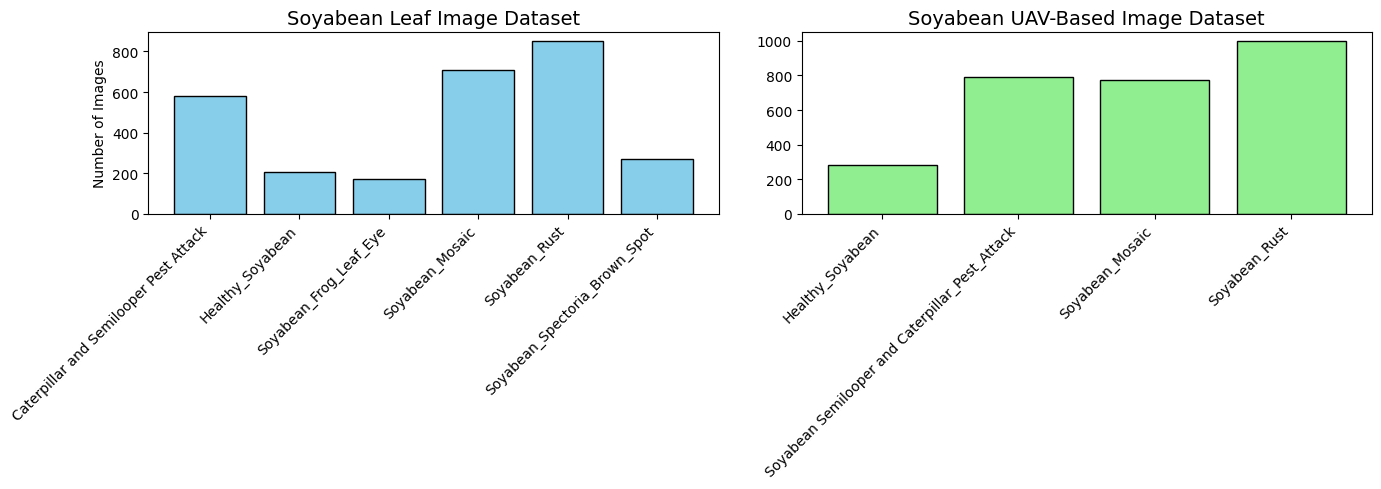

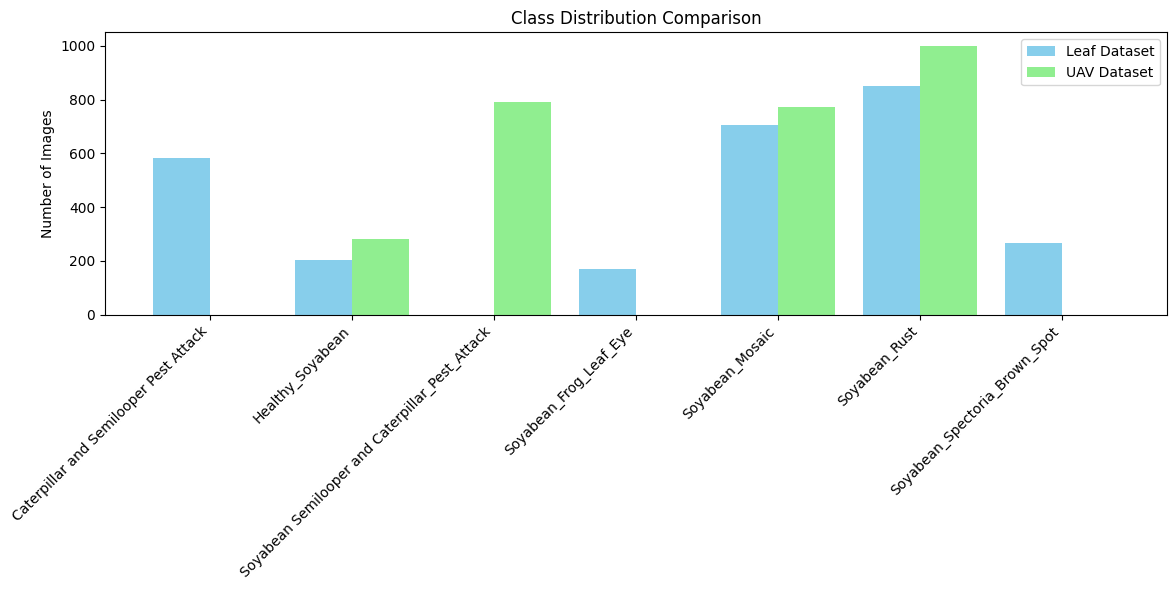

In [10]:
import matplotlib.pyplot as plt

# Your existing counts
leaf_counts = {
    "Caterpillar and Semilooper Pest Attack": 582,
    "Healthy_Soyabean": 204,
    "Soyabean_Frog_Leaf_Eye": 169,
    "Soyabean_Mosaic": 707,
    "Soyabean_Rust": 852,
    "Soyabean_Spectoria_Brown_Spot": 268
}

uav_counts = {
    "Healthy_Soyabean": 280,
    "Soyabean Semilooper and Caterpillar_Pest_Attack": 790,
    "Soyabean_Mosaic": 772,
    "Soyabean_Rust": 1000
}

# ====  Separate bar charts ====
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Leaf dataset chart
# Leaf dataset chart
axes[0].bar(leaf_counts.keys(), leaf_counts.values(), color='skyblue', edgecolor='black')
axes[0].set_title("Soyabean Leaf Image Dataset", fontsize=14)
axes[0].set_ylabel("Number of Images")
axes[0].set_xticklabels(leaf_counts.keys(), rotation=45, ha="right")

# UAV dataset chart
axes[1].bar(uav_counts.keys(), uav_counts.values(), color='lightgreen', edgecolor='black')
axes[1].set_title("Soyabean UAV-Based Image Dataset", fontsize=14)
axes[1].set_xticklabels(uav_counts.keys(), rotation=45, ha="right")


plt.tight_layout()
plt.show()

# ====  Combined grouped bar chart ====
all_classes = sorted(set(leaf_counts.keys()) | set(uav_counts.keys()))
leaf_values = [leaf_counts.get(cls, 0) for cls in all_classes]
uav_values = [uav_counts.get(cls, 0) for cls in all_classes]

x = range(len(all_classes))
width = 0.4

plt.figure(figsize=(12, 6))
plt.bar([i - width/2 for i in x], leaf_values, width=width, label="Leaf Dataset", color='skyblue')
plt.bar([i + width/2 for i in x], uav_values, width=width, label="UAV Dataset", color='lightgreen')

plt.xticks(x, all_classes, rotation=45, ha="right")
plt.ylabel("Number of Images")
plt.title("Class Distribution Comparison")
plt.legend()
plt.tight_layout()
plt.show()



üìä Class distribution: {'Soyabean_Leaf_Image_Dataset_Caterpillar and Semilooper Pest Attack': 0, 'Soyabean_Leaf_Image_Dataset_Healthy_Soyabean': 204, 'Soyabean_Leaf_Image_Dataset_Soyabean_Frog_Leaf_Eye': 169, 'Soyabean_Leaf_Image_Dataset_Soyabean_Mosaic': 707, 'Soyabean_Leaf_Image_Dataset_Soyabean_Rust': 852, 'Soyabean_Leaf_Image_Dataset_Soyabean_Spectoria_Brown_Spot': 268, 'Soyabean_UAV-Based_Image_Dataset_Healthy_Soyabean': 280, 'Soyabean_UAV-Based_Image_Dataset_Soyabean Semilooper and Caterpillar_Pest_Attack': 0}


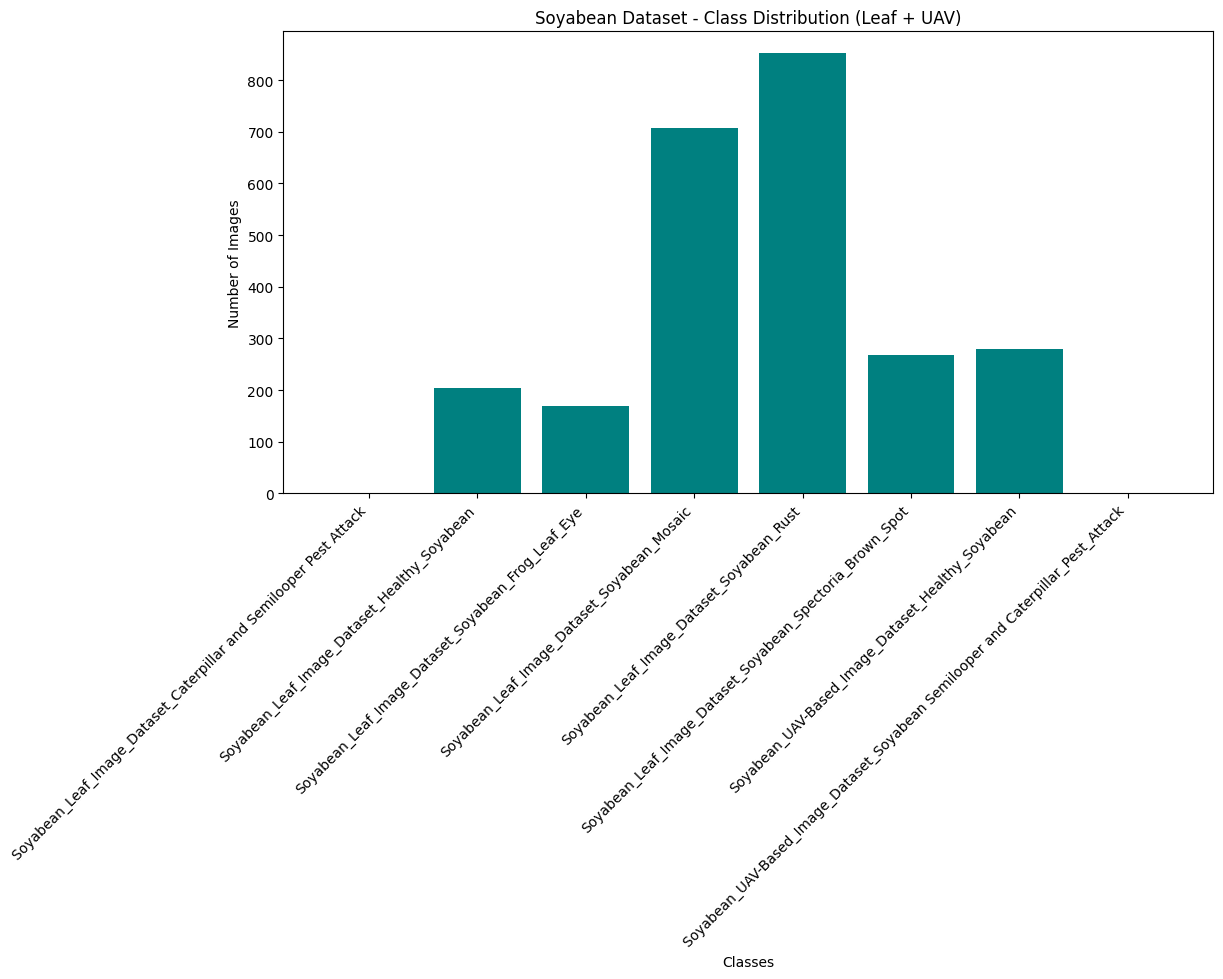

In [9]:
import os
import matplotlib.pyplot as plt

# ‚úÖ Base dataset path
dataset_path = r"C:\Users\sayan_dey\Desktop\Sayan Dey\Updated Dataset\SoyaHealthVision"

# Sub-datasets (Leaf + UAV)
subsets = ["Soyabean_Leaf_Image_Dataset", "Soyabean_UAV-Based_Image_Dataset"]

class_counts = {}

# Loop through both datasets
for subset in subsets:
    subset_path = os.path.join(dataset_path, subset)
    for cls in os.listdir(subset_path):
        cls_path = os.path.join(subset_path, cls)
        if os.path.isdir(cls_path):
            count = 0
            for r, d, files in os.walk(cls_path):
                count += len([f for f in files if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
            class_counts[f"{subset}_{cls}"] = count

print("\nüìä Class distribution:", class_counts)

# Plot
plt.figure(figsize=(12,6))
plt.bar(class_counts.keys(), class_counts.values(), color="teal")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Soyabean Dataset - Class Distribution (Leaf + UAV)")
plt.xticks(rotation=45, ha='right')
plt.show()


# Class distribution

C:\Users\sayan_dey\AppData\Local\Temp\ipykernel_12652\2084381731.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(counts, vert=True, patch_artist=True, labels=["Classes"])
C:\Users\sayan_dey\AppData\Local\Temp\ipykernel_12652\2084381731.py:54: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


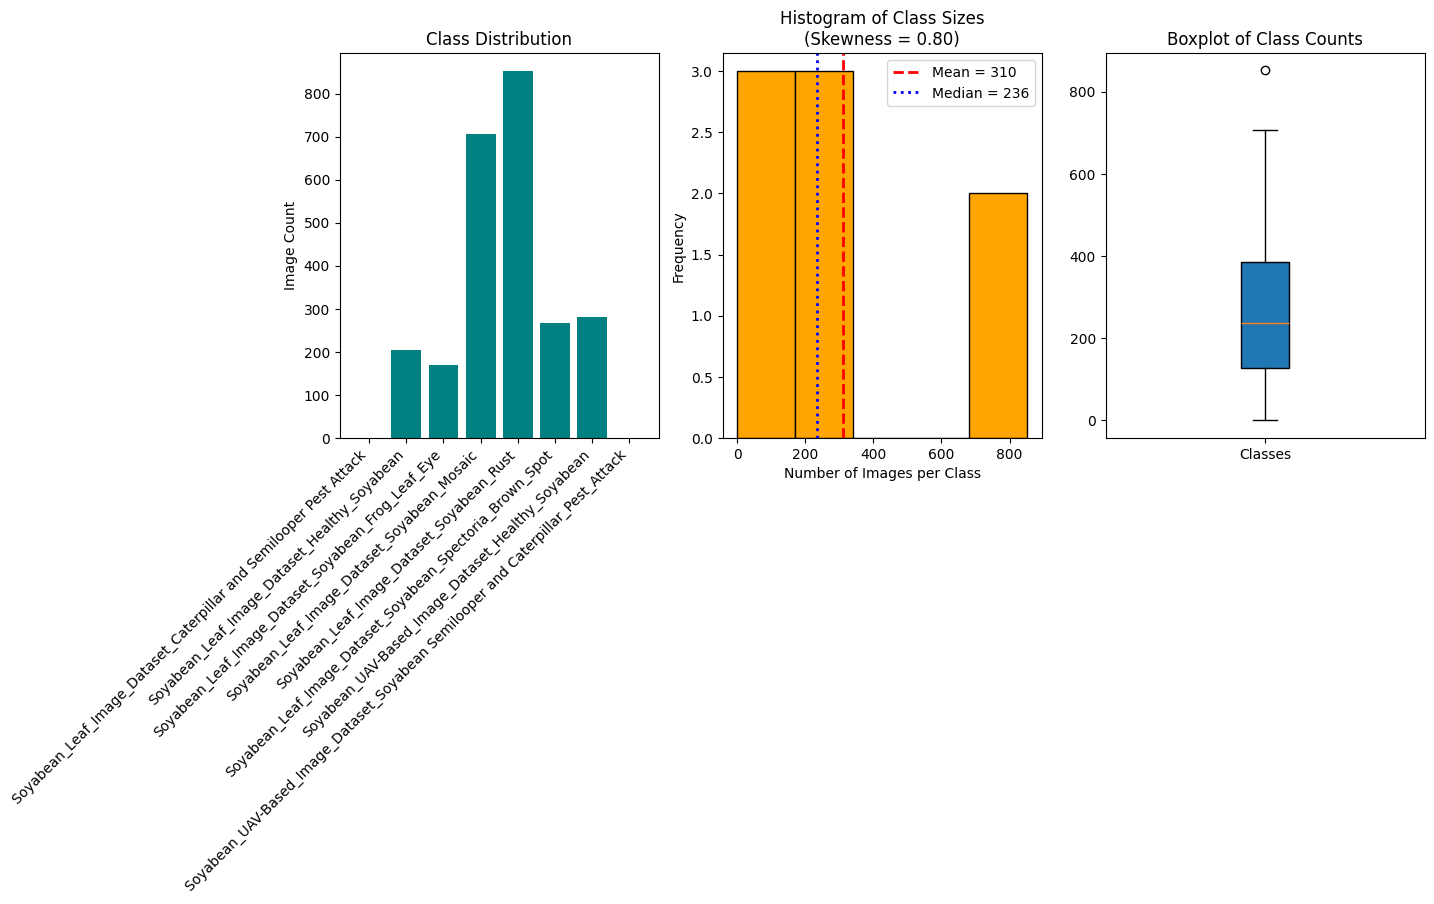

In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, entropy

# ‚úÖ Base dataset path
dataset_path = r"C:\Users\sayan_dey\Desktop\Sayan Dey\Updated Dataset\SoyaHealthVision"
subsets = ["Soyabean_Leaf_Image_Dataset", "Soyabean_UAV-Based_Image_Dataset"]

class_counts = {}

# Count images per class
for subset in subsets:
    subset_path = os.path.join(dataset_path, subset)
    for cls in os.listdir(subset_path):
        cls_path = os.path.join(subset_path, cls)
        if os.path.isdir(cls_path):
            count = 0
            for r, d, files in os.walk(cls_path):
                count += len([f for f in files if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
            class_counts[f"{subset}_{cls}"] = count

# Convert to numpy array
counts = np.array(list(class_counts.values()))

# Skewness
skewness = skew(counts)

# ---- PLOTS ----
plt.figure(figsize=(14,5))

# 1. Bar plot (class distribution)
plt.subplot(1,3,1)
plt.bar(class_counts.keys(), counts, color="teal")
plt.xticks(rotation=45, ha="right")
plt.title("Class Distribution")
plt.ylabel("Image Count")

# 2. Histogram (distribution of counts)
plt.subplot(1,3,2)
plt.hist(counts, bins=5, color="orange", edgecolor="black")
plt.axvline(np.mean(counts), color="red", linestyle="dashed", linewidth=2, label=f"Mean = {np.mean(counts):.0f}")
plt.axvline(np.median(counts), color="blue", linestyle="dotted", linewidth=2, label=f"Median = {np.median(counts):.0f}")
plt.title(f"Histogram of Class Sizes\n(Skewness = {skewness:.2f})")
plt.xlabel("Number of Images per Class")
plt.ylabel("Frequency")
plt.legend()

# 3. Boxplot (spread & skewness)
plt.subplot(1,3,3)
plt.boxplot(counts, vert=True, patch_artist=True, labels=["Classes"])
plt.title("Boxplot of Class Counts")

plt.tight_layout()
plt.show()


In [12]:
if skewness > 0:
    print(f"üìà Skewness = {skewness:.2f} ‚Üí Right-skewed (long tail on higher class counts)")
elif skewness < 0:
    print(f"üìâ Skewness = {skewness:.2f} ‚Üí Left-skewed (long tail on lower class counts)")
else:
    print(f"‚öñÔ∏è Skewness = {skewness:.2f} ‚Üí Nearly symmetric")


üìà Skewness = 0.80 ‚Üí Right-skewed (long tail on higher class counts)


In [13]:
from scipy.stats import skew, entropy
import numpy as np
import os

dataset_path = r"C:\Users\sayan_dey\Desktop\Sayan Dey\Updated Dataset\SoyaHealthVision"

def analyze_subset(subset_name):
    subset_path = os.path.join(dataset_path, subset_name)
    class_counts = {}

    for cls in os.listdir(subset_path):
        cls_path = os.path.join(subset_path, cls)
        if os.path.isdir(cls_path):
            count = 0
            for r, d, files in os.walk(cls_path):
                count += len([f for f in files if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
            class_counts[cls] = count

    counts = np.array(list(class_counts.values()))
    skewness = skew(counts)

    if skewness > 0:
        skew_type = "Right-skewed (positive skew)"
    elif skewness < 0:
        skew_type = "Left-skewed (negative skew)"
    else:
        skew_type = "Nearly symmetric"

    print(f"\nüìÇ {subset_name}")
    print("Class distribution:", class_counts)
    print(f"Skewness = {skewness:.2f} ‚Üí {skew_type}")
    return class_counts, skewness

# üåø Leaf dataset
leaf_counts, leaf_skew = analyze_subset("Soyabean_Leaf_Image_Dataset")

# üöÅ UAV dataset
uav_counts, uav_skew = analyze_subset("Soyabean_UAV-Based_Image_Dataset")



üìÇ Soyabean_Leaf_Image_Dataset
Class distribution: {'Caterpillar and Semilooper Pest Attack': 0, 'Healthy_Soyabean': 204, 'Soyabean_Frog_Leaf_Eye': 169, 'Soyabean_Mosaic': 707, 'Soyabean_Rust': 852, 'Soyabean_Spectoria_Brown_Spot': 268}
Skewness = 0.53 ‚Üí Right-skewed (positive skew)

üìÇ Soyabean_UAV-Based_Image_Dataset
Class distribution: {'Healthy_Soyabean': 280, 'Soyabean Semilooper and Caterpillar_Pest_Attack': 0}
Skewness = 0.00 ‚Üí Nearly symmetric


# Dataset skewness

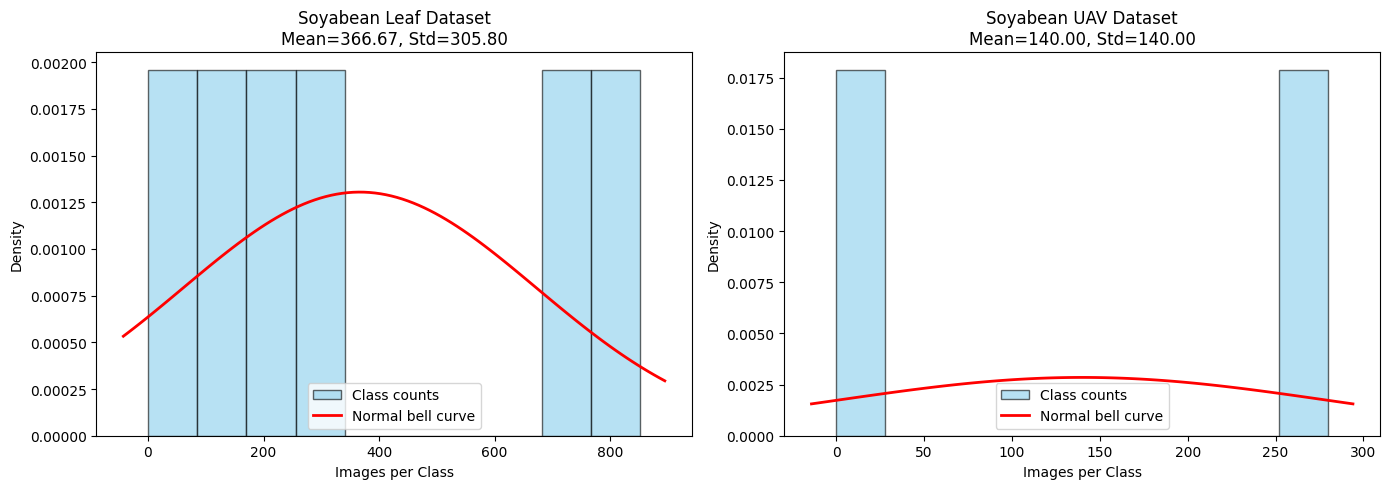

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ‚úÖ Base dataset path
dataset_path = r"C:\Users\sayan_dey\Desktop\Sayan Dey\Updated Dataset\SoyaHealthVision"

def get_class_counts(subset_name):
    subset_path = os.path.join(dataset_path, subset_name)
    class_counts = {}
    for cls in os.listdir(subset_path):
        cls_path = os.path.join(subset_path, cls)
        if os.path.isdir(cls_path):
            count = 0
            for r, d, files in os.walk(cls_path):
                count += len([f for f in files if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
            class_counts[cls] = count
    return np.array(list(class_counts.values())), class_counts

# üåø Leaf dataset
leaf_counts, leaf_dict = get_class_counts("Soyabean_Leaf_Image_Dataset")

# üöÅ UAV dataset
uav_counts, uav_dict = get_class_counts("Soyabean_UAV-Based_Image_Dataset")

# üìä Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax, counts, title in zip(
    axes,
    [leaf_counts, uav_counts],
    ["Soyabean Leaf Dataset", "Soyabean UAV Dataset"]
):
    mu, sigma = np.mean(counts), np.std(counts)
    
    # Histogram
    ax.hist(counts, bins=10, density=True, alpha=0.6, color="skyblue", edgecolor="black", label="Class counts")
    
    # Bell curve
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)
    ax.plot(x, p, 'r', linewidth=2, label="Normal bell curve")
    
    ax.set_title(f"{title}\nMean={mu:.2f}, Std={sigma:.2f}")
    ax.set_xlabel("Images per Class")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()


# Healthy vs diseased dataset

üìä Leaf Dataset ‚Üí Healthy: 204 Diseased: 1996
üìä UAV Dataset ‚Üí Healthy: 280 Diseased: 0


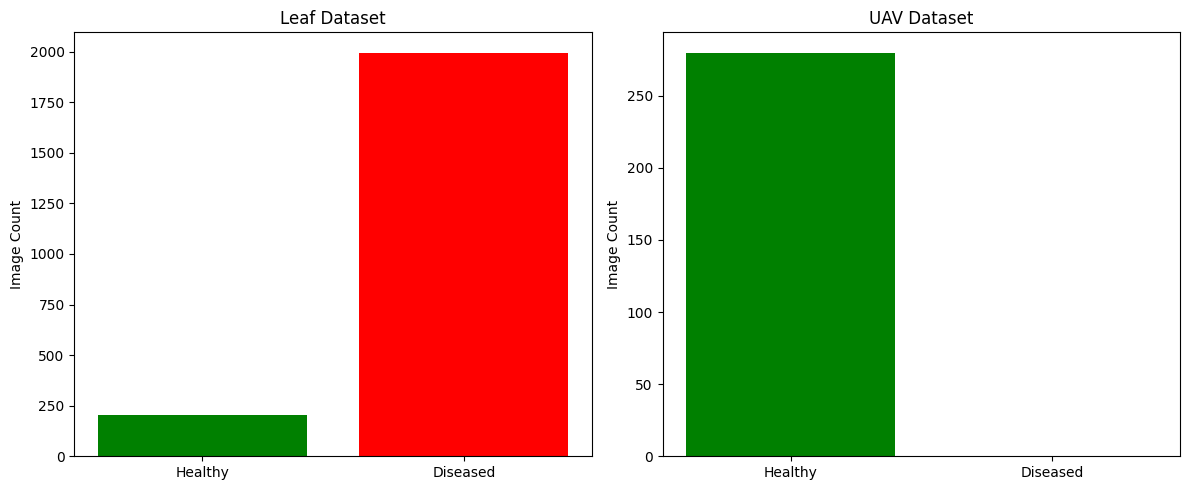

In [20]:
import os
import matplotlib.pyplot as plt

# ‚úÖ Dataset paths
leaf_path = r"C:\Users\sayan_dey\Desktop\Sayan Dey\Updated Dataset\SoyaHealthVision\Soyabean_Leaf_Image_Dataset"
uav_path  = r"C:\Users\sayan_dey\Desktop\Sayan Dey\Updated Dataset\SoyaHealthVision\Soyabean_UAV-Based_Image_Dataset"

def healthy_vs_diseased(base_path, healthy_class="Healthy_Soyabean"):
    healthy, diseased = 0, 0
    for cls in os.listdir(base_path):
        cls_path = os.path.join(base_path, cls)
        if not os.path.isdir(cls_path):
            continue
        
        # Count recursively (go into nested folders too)
        count = 0
        for r, d, files in os.walk(cls_path):
            count += len([f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        
        if healthy_class in cls:  # handle nested names like Healthy_Soyabean/Healthy_Soyabean
            healthy += count
        else:
            diseased += count
    return healthy, diseased

# üåø Leaf dataset
leaf_healthy, leaf_diseased = healthy_vs_diseased(leaf_path)

# üöÅ UAV dataset
uav_healthy, uav_diseased = healthy_vs_diseased(uav_path)

print("üìä Leaf Dataset ‚Üí Healthy:", leaf_healthy, "Diseased:", leaf_diseased)
print("üìä UAV Dataset ‚Üí Healthy:", uav_healthy, "Diseased:", uav_diseased)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12,5))
datasets = ["Leaf Dataset", "UAV Dataset"]
values = [(leaf_healthy, leaf_diseased), (uav_healthy, uav_diseased)]

for ax, (healthy, diseased), title in zip(axes, values, datasets):
    ax.bar(["Healthy", "Diseased"], [healthy, diseased], color=["green", "red"])
    ax.set_title(title)
    ax.set_ylabel("Image Count")

plt.tight_layout()
plt.show()
